# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [15]:
#importando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [16]:
#importando dataset e criando novas colunas 
tips = sns.load_dataset("tips") #importando dataset

# criando novas colunas - tip_pct (porcentagem da tip) 
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#calculando a porcentagem da tip
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [17]:
# Carregar o dataset "tips"
tips = sns.load_dataset("tips")

# Criar as colunas necessárias
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])  # Percentual da gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']  # Valor da conta sem a gorjeta


In [18]:
# Filtrar para remover outliers de gorjetas acima de 50% da conta
dados_filtrados = tips[tips['tip_pct'] < 0.5]

# Ajustar o modelo
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=dados_filtrados).fit()

# Visualizar o resumo do modelo
print(reg_tip_pct.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.31e-12
Time:                        20:45:37   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

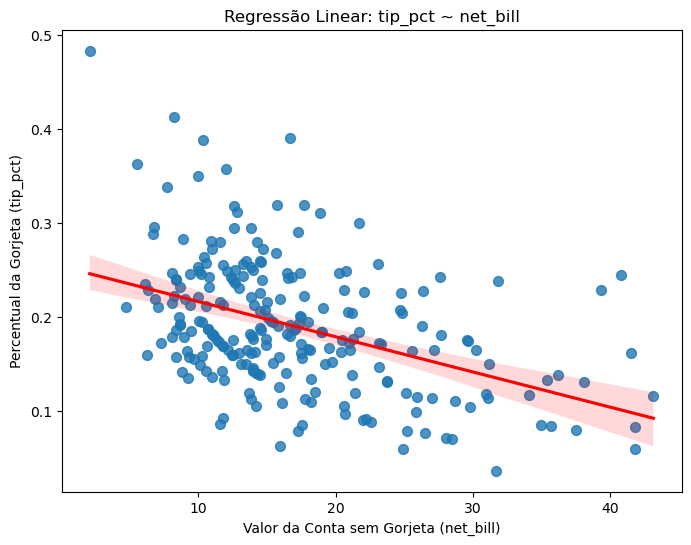

In [20]:
# Gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x='net_bill', y='tip_pct', data=dados_filtrados,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Linear: tip_pct ~ net_bill')
plt.xlabel('Valor da Conta sem Gorjeta (net_bill)')
plt.ylabel('Percentual da Gorjeta (tip_pct)')
plt.show()


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [27]:
# Evitar log(0) ou valores negativos
dados_filtrados = tips[tips['tip_pct'] < 0.5].copy()
dados_filtrados = dados_filtrados[dados_filtrados['net_bill'] > 0]

# Criar a coluna com o logaritmo de net_bill
dados_filtrados['log_net_bill'] = np.log(dados_filtrados['net_bill'])




In [29]:
# Ajustar o modelo: tip_pct ~ log(net_bill)
reg_log = smf.ols('tip_pct ~ log_net_bill', data=dados_filtrados).fit()

# Ver resumo do modelo
print(reg_log.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.03e-14
Time:                        20:45:45   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3818      0.023     16.261   

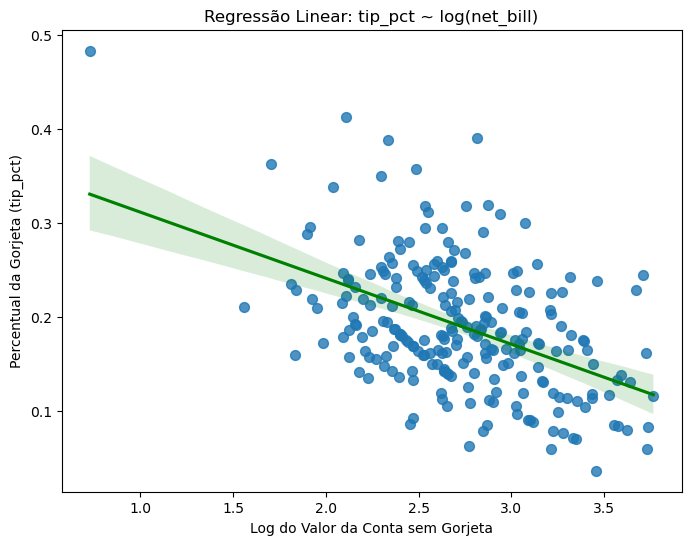

In [31]:
plt.figure(figsize=(8, 6))
sns.regplot(x='log_net_bill', y='tip_pct', data=dados_filtrados,
            scatter_kws={'s': 50}, line_kws={'color': 'green'})

plt.title('Regressão Linear: tip_pct ~ log(net_bill)')
plt.xlabel('Log do Valor da Conta sem Gorjeta')
plt.ylabel('Percentual da Gorjeta (tip_pct)')
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

Este modelo tenta encontrar uma curva que melhor se ajusta, à relação entre o valor da conta (net_bill) e o percentual da gorjeta (tip_pct), assumindo que essa relação é quadrática — ou seja, pode ter formato de U ou de arco invertido.

In [48]:
# Adicionar coluna com o quadrado de net_bill (termo do polinômio de 2º grau)
dados_filtrados['net_bill_sq'] = dados_filtrados['net_bill'] ** 2

#Ajustar o modelo de regressão com polinômio de 2º grau
modelo_poli = smf.ols('tip_pct ~ net_bill + net_bill_sq', data=dados_filtrados).fit()

#Resumo do modelo
print(modelo_poli.summary())



                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.09e-12
Time:                        21:10:00   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2932      0.020     14.668      

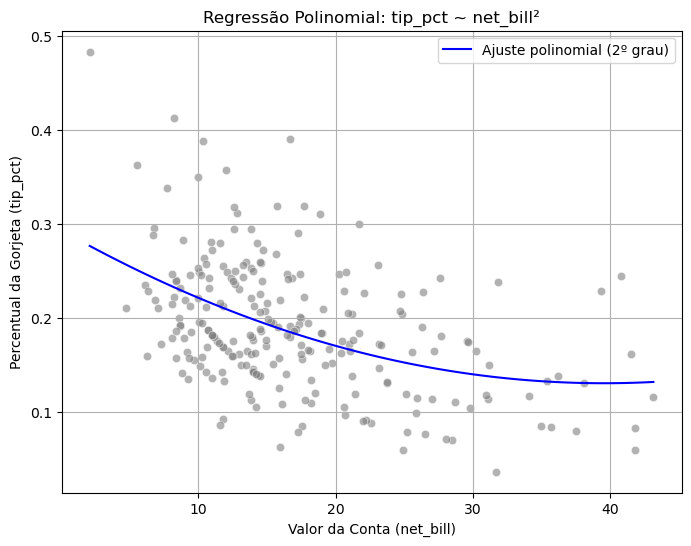

In [50]:
#  Visualizar o ajuste
x = np.linspace(dados_filtrados['net_bill'].min(), dados_filtrados['net_bill'].max(), 100)
x_df = pd.DataFrame({'net_bill': x, 'net_bill_sq': x**2})
y_pred = modelo_poli.predict(x_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=dados_filtrados, color='gray', alpha=0.6)
plt.plot(x, y_pred, color='blue', label='Ajuste polinomial (2º grau)')
plt.title("Regressão Polinomial: tip_pct ~ net_bill²")
plt.xlabel("Valor da Conta (net_bill)")
plt.ylabel("Percentual da Gorjeta (tip_pct)")
plt.legend()
plt.grid(True)
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [54]:
from sklearn.metrics import r2_score

#Adicionar o log do tip_pct
dados_filtrados['log_tip_pct'] = np.log(dados_filtrados['tip_pct'])

# Ajustar o modelo
modelo_log = smf.ols('log_tip_pct ~ net_bill', data=dados_filtrados).fit()
print(modelo_log.summary())

# Obter valores preditos e converter para escala original
log_preditos = modelo_log.fittedvalues
tip_pct_preditos = np.exp(log_preditos)

# Calcular o R² para o tip_pct real
r2 = r2_score(dados_filtrados['tip_pct'], tip_pct_preditos)
print(f'R² para previsão de tip_pct (com log): {r2:.4f}')

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Mon, 19 May 2025   Prob (F-statistic):           5.70e-15
Time:                        21:12:01   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

 ESTA QUESTÃO ESTÁ REPETIDA. É IGUAL A QUESTÃO ANTERIOR - 04.

###  6. qual modelo resultou no melhor ajuste?

Entendi que o último modelo: tip_pct ~ net_bill + net_bill² (modelo polinomial de 2º grau)

Para contas muito baixas, a gorjeta percentual pode ser maior.

Para contas altas, a pessoa pode dar uma gorjeta proporcionalmente menor.


Esse modelo é o melhor porque ele acompanha melhor a forma como as pessoas realmente agem quando dão gorjeta. E isso foi confirmado pelo número R², que mostra que ele acerta mais nas previsões do que os modelos simples.